The following is a proposed solution to the Bingo Game
We want to know the probability of a BINGO as a function of the number of balls drawn
The large prize is usually awarded if a BINGO blackout happens with 50 balls drawn

In [1]:
import scipy
from scipy.special import factorial

In [2]:
factorial(3)

6.0

Let's consider each column separately. 
If we know the probability of each column being filled separately, we can multiply the probabilities
of each column to find the probability that the card is filled.

Column B: 1-15; 5 numbers on card
Column I: 16-30; 5 numbers on card
Column N: 31-45; 4 numbers on card (centre is free)
Column G: 46-60; 5 numbers on card
Column O: 61-75; 5 numbers on card

In [13]:
def prob_col(total,col_picks,draws):
    col_combos=factorial(draws)/(factorial(col_picks)*(factorial(draws-col_picks)))
    total_combos=factorial(total)/(factorial(col_picks)*(factorial(total-col_picks)))
    prob=col_combos/total_combos
    return prob

In [34]:
col_pics=[5,5,4,5,5]
total=75
prob_card_blackout=[]
for draws in range(24,76):
    prob_total_blackout=1
    for i in range(len(col_pics)):
        prob_col_blackout=prob_col(total,col_pics[i],draws)
        prob_total_blackout=prob_col_blackout*prob_total_blackout
    prob_card_blackout.append(prob_total_blackout)
print(prob_card_blackout)       

[3.215512156703224e-13, 9.345680328959792e-13, 2.5952416469796565e-12, 6.9115915243668576e-12, 1.7711104043610833e-11, 4.37976338243881e-11, 1.0479089249798229e-10, 2.431503238641188e-10, 5.482916802669233e-10, 1.2037913882122357e-09, 2.5777011838751267e-09, 5.3917044749837245e-09, 1.1031684435314442e-08, 2.2107345440026914e-08, 4.344300956994025e-08, 8.380293451854686e-08, 1.588490072599237e-07, 2.961365833708611e-07, 5.434355190487976e-07, 9.82406675782477e-07, 1.7507989116908348e-06, 3.0780453546717784e-06, 5.3416995373835775e-06, 9.155944014865903e-06, 1.5508965023474652e-05, 2.5974069422260108e-05, 4.3031068670371244e-05, 7.055110620944298e-05, 0.0001145217238709288, 0.00018412221685459214, 0.0002933058127105238, 0.00046310974943963303, 0.0007250033460027058, 0.0011257061665500801, 0.0017340745912337412, 0.0026508802173359656, 0.004022606685726863, 0.006060797619915989, 0.00906902948104166, 0.013480300547919011, 0.019908573737563714, 0.02921945388688577, 0.042626604828863185, 0.06

In [37]:
1/prob_card_blackout[26]

23239.023126761047

It appears the probability of a BINGO in 50 numbers is one in 23,239.  Sounds reasonable.

In [38]:
import matplotlib.pyplot as plt

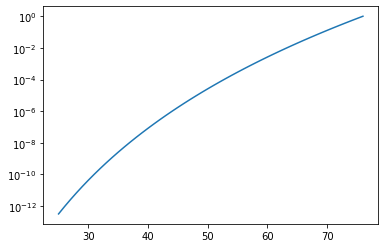

In [39]:
x=[]
for i in range(24,76):
    x.append(i+1)
y=prob_card_blackout   
plt.yscale('log')
plt.plot(x,y)